## Problem Description

#### Your goal is to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines. Specifically, you'll be predicting two probabilities: one for h1n1_vaccine and one for seasonal_vaccine.

Each row in the dataset represents one person who responded to the National 2009 H1N1 Flu Survey


You are provided a dataset with 36 columns. The first column respondent_id is a unique and random identifier. The remaining 35 features are described below.

For all binary variables: 0 = No; 1 = Yes.

h1n1_concern - Level of concern about the H1N1 flu.\
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.\
h1n1_knowledge - Level of knowledge about H1N1 flu.\
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.\
behavioral_antiviral_meds - Has taken antiviral medications. (binary)\
behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)\
behavioral_face_mask - Has bought a face mask. (binary)\
behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary\
behavioral_large_gatherings - Has reduced time at large gatherings. (binary)\
behavioral_outside_home - Has reduced contact with people outside of own household. (binary)\
behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)\
doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)\
doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)\
chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)\
child_under_6_months - Has regular close contact with a child under the age of six months. (binary)\
health_worker - Is a healthcare worker. (binary)\
health_insurance - Has health insurance. (binary)\
opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.\
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.\
opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.\
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.\
opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.\
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.\
opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.\
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.\
opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.\
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.\
opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.\
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.\
age_group - Age group of respondent.

education - Self-reported education level.\
race - Race of respondent.\
sex - Sex of respondent.\
income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.\
marital_status - Marital status of respondent.\
rent_or_own - Housing situation of respondent.\
employment_status - Employment status of respondent.\
hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.\
census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.\
household_adults - Number of other adults in household, top-coded to 3.\
household_children - Number of children in household, top-coded to 3.\
employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.\
employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.

In [1]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dftrain=pd.read_csv("training_set_features.csv")

In [3]:
dftest=pd.read_csv("test_set_features.csv")

In [4]:
y_train=pd.read_csv("training_set_labels.csv")

In [5]:
df=dftrain.append(dftest,ignore_index=True)

In [6]:
dftrain.shape,dftest.shape,df.shape

((26707, 36), (26708, 36), (53415, 36))

In [7]:
dftrain.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                53415 non-null  int64  
 1   h1n1_concern                 53238 non-null  float64
 2   h1n1_knowledge               53177 non-null  float64
 3   behavioral_antiviral_meds    53265 non-null  float64
 4   behavioral_avoidance         52994 non-null  float64
 5   behavioral_face_mask         53377 non-null  float64
 6   behavioral_wash_hands        53333 non-null  float64
 7   behavioral_large_gatherings  53256 non-null  float64
 8   behavioral_outside_home      53251 non-null  float64
 9   behavioral_touch_face        53159 non-null  float64
 10  doctor_recc_h1n1             49095 non-null  float64
 11  doctor_recc_seasonal         49095 non-null  float64
 12  chronic_med_condition        51512 non-null  float64
 13  child_under_6_mo

In [9]:
# Divide the data into numerical ("quancol") and categorical ("catcol") features
quancol = list( dftest.loc[:,dftrain.dtypes != 'object'].drop('respondent_id',axis=1).columns.values )
catcol = list( dftest.loc[:,dftrain.dtypes == 'object'].columns.values )

In [10]:
quancol

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children']

In [11]:
#Update categorical columns which are represented with numbers and remove it from quancol
newcatcol=['behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask','behavioral_wash_hands',
           'behavioral_large_gatherings','behavioral_outside_home','behavioral_touch_face','doctor_recc_h1n1', 
           'doctor_recc_seasonal','chronic_med_condition','child_under_6_months','health_worker','health_insurance']
catcol=catcol+newcatcol
for i in newcatcol: quancol.remove(i)

In [12]:
catcol

['age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'employment_industry',
 'employment_occupation',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance']

### Heatmap
Let's see how our features are correlated to each other by plotting heatmap 

<AxesSubplot:>

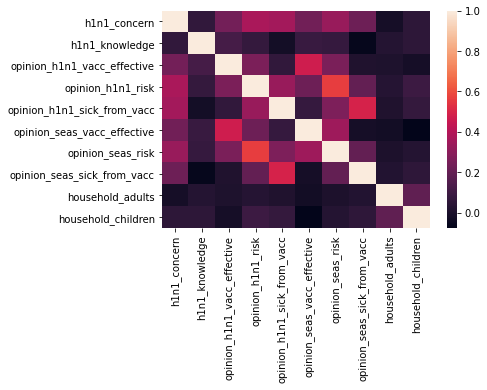

In [13]:
sns.heatmap(dftrain[quancol].corr())

### Labels
Let's start by taking a look at our distribution of the two target variables

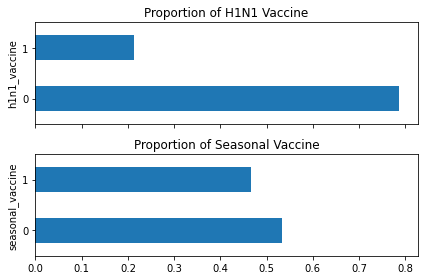

In [14]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = y_train.shape[0]

(y_train['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")

(y_train['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()


It looks like roughy half of people received the seasonal flu vaccine, but only about 20% of people received the H1N1 flu vaccine. In terms of class balance, we say that the seasonal flu vaccine target has balanced classes, but the H1N1 flu vaccine target has moderately imbalanced classes.

Are the two target variables independent? Let's take a look

In [15]:
pd.crosstab(
    y_train["h1n1_vaccine"], 
    y_train["seasonal_vaccine"], 
    margins=True
)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,13295,7738,21033
1,977,4697,5674
All,14272,12435,26707


In [16]:
# Phi Coefficient is the same as Pearson for two binary variables
y_train["h1n1_vaccine"].corr(y_train["seasonal_vaccine"], method="pearson")

0.37714265306144507

These two variables have a phi coefficient of 0.37, indicating a moderate positive correlation. We can see that in the cross-tabulation as well. Most people who got an H1N1 flu vaccine also got the seasonal flu vaccine. While a minority of people who got the seasonal vaccine got the H1N1 vaccine, they got the H1N1 vaccine at a higher rate than those who did not get the seasonal vaccine

In [17]:
#Let's do chi sqaure test to check association two labels
#Define null &alternate hypothesis
#null:There is no association between two labels.
#alternate: There is association between two labels.
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(y_train["h1n1_vaccine"], y_train["seasonal_vaccine"]))
#p-value 0.0 is less than 0.05 so we are rejecting null hypothesis

(3796.8641900765715,
 0.0,
 1,
 array([[11239.86130977,  9793.13869023],
        [ 3032.13869023,  2641.86130977]]))

### Features
Next, let's take a look at our features. From the problem description page, we know that the feature variables are all categorical: a mix of binary, ordinal, and nominal features. Let's pick a few and see how the rates of vaccination may differ across the levels of the feature variables.

First, let's combine our features and labels into one dataframe

In [18]:
joined_df = dftrain.join(y_train.set_index("respondent_id"))
print(dftrain.shape)

(26707, 36)


### Prototyping a Plot
Next, let's see how the features are correlated with the target variables. We'll start with trying to visualize if there is simple bivariate correlation. If a feature is correlated with the target, we'd expect there to be different patterns of vaccination as you vary the values of the feature.

Jumping right to the right final visualization is hard. We can instead pick one feature and one target and work our way up to a prototype, before applying it to more features and both targets. We'll use h1n1_concern, the level of concern the person showed about the H1N1 flu, and h1n1_vaccine as a target variable.

First, we'll get the count of observations for each combination of those two variables.

In [19]:
counts = (joined_df[['h1n1_concern', 'h1n1_vaccine']]
              .groupby(['h1n1_concern', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine')
         )
counts

h1n1_vaccine,0,1
h1n1_concern,,
0.0,2849,447
1.0,6756,1397
2.0,8102,2473
3.0,3250,1341



It's hard to eyeball these raw numbers and see patterns clearly. Let's put this into a bar chart. We'll compare how the group sizes change as you vary h1n1_concern

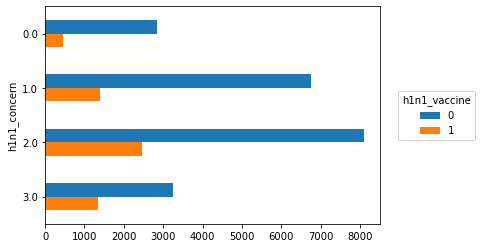

In [20]:
# To plot h1n1_vaccine as a separate series, 
# we pivot using unstack to make h1n1_vaccine into columns 
ax = counts.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center right', 
    bbox_to_anchor=(1.3, 0.5), 
    title='h1n1_vaccine'
)

Unfortunately, it's still hard to tell whether h1n1_concern levels show differences in someone's likelihood to get vaccinated. Since the two classes are imbalanced, we just see fewer vaccinated observations for every level of h1n1_concern. It swamps out any other trends that might exist.

Let's instead look at the rate of vaccination for each level of h1n1_concern

In [21]:
h1n1_concern_counts = counts.sum(axis='columns')
h1n1_concern_counts

h1n1_concern
0.0     3296
1.0     8153
2.0    10575
3.0     4591
dtype: int64

In [22]:
props = counts.div(h1n1_concern_counts, axis='index')
props

h1n1_vaccine,0,1
h1n1_concern,,
0.0,0.864381,0.135619
1.0,0.828652,0.171348
2.0,0.766147,0.233853
3.0,0.707907,0.292093


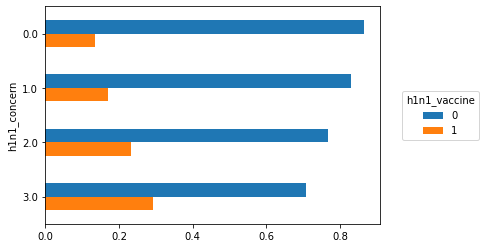

In [23]:
ax = props.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

that even though most people don't get the H1N1 vaccine, they are more likely to if they have a higher level of concern. It looks like h1n1_concern will be a useful feature when we get to modeling.

Since every pair of bars adds up to 1.0 and we only have two bars, this is actually a good use case for a stacked bar chart, to make it even easier to read.

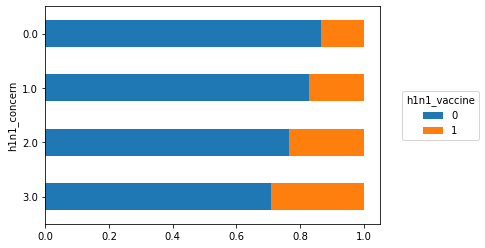

In [24]:
ax = props.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

In [25]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (joined_df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

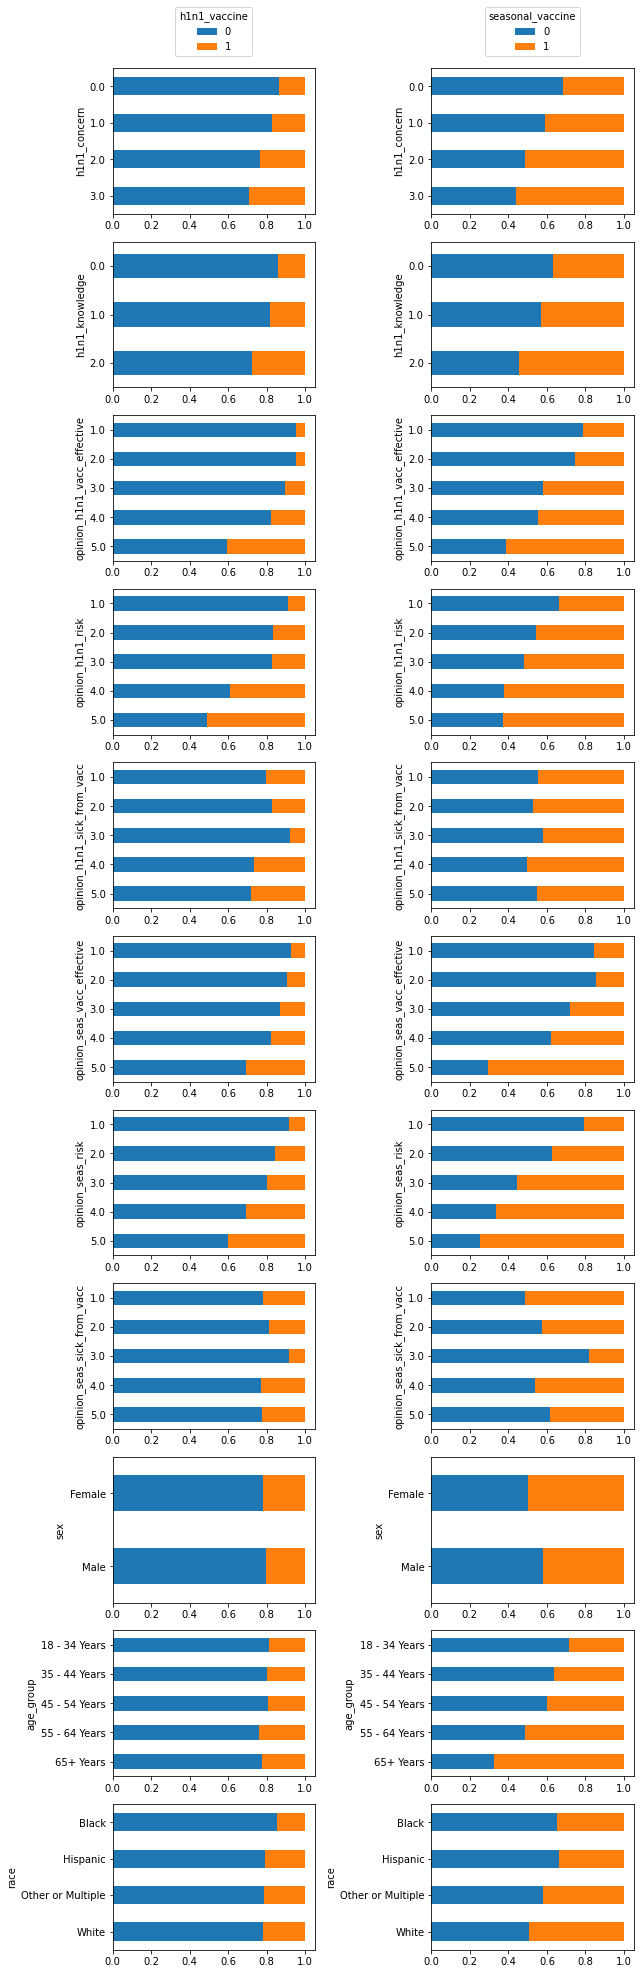

In [26]:
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
]

fig, ax = plt.subplots(len(cols_to_plot), 2, figsize=(9,len(cols_to_plot)*2.5))
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(col, 'h1n1_vaccine', joined_df, ax=ax[idx, 0])
    vaccination_rate_plot(col, 'seasonal_vaccine', joined_df, ax=ax[idx, 1])
    
ax[0, 0].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine')
ax[0, 1].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine')
fig.tight_layout()

In [27]:
dftrain[quancol].isnull().sum().sort_values(ascending=False)

opinion_seas_sick_from_vacc    537
opinion_seas_risk              514
opinion_seas_vacc_effective    462
opinion_h1n1_sick_from_vacc    395
opinion_h1n1_vacc_effective    391
opinion_h1n1_risk              388
household_adults               249
household_children             249
h1n1_knowledge                 116
h1n1_concern                    92
dtype: int64

## Missing values imputation

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline,make_pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score

RANDOM_SEED = 6    # Set a random seed for reproducibility!

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
numeric_cols=dftrain[quancol]
cat_col=dftrain[catcol]

In [32]:
# chain preprocessing into a Pipeline object
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])
cat_preprocessing_steps=Pipeline([
    ("One Hot Encoder",OneHotEncoder(sparse=False,drop="first")),
    ('simple_imputer',SimpleImputer(strategy="most_frequent"))
])

# create the preprocessor stage of final pipeline
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, quancol),
        ("categorical",cat_preprocessing_steps,catcol)
    ],
    remainder = "drop"
)

## Buliding The Model

### Logistic Regression Model

In [33]:
estimators = MultiOutputClassifier(
    estimator=LogisticRegression(penalty="l2", C=1,max_iter=1000)
)

In [34]:
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

In [35]:
from sklearn import set_config
set_config(display='diagram')

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'opinion_h1n1_vacc_effective',
                                                   'opinion_h1n1_risk',
                                                   'opinion_h1n1_sick_from_vacc',
                                                   'opinion_seas_vacc_effective',
                                                   'opinion_seas_risk',
                                                   'opin...
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'behavioral_outside_home',
                                                   'behavioral_touch_face',
                                                   'doctor_recc_h1n1',
                                                   'doctor_recc_seasonal',
                                                   'chronic_med_condition',
                                                   'child_under_6_months',
                                                   'health_worker',
                                                   'health_insurance'])])),
                ('estimators',
                 MultiOutputClassifier(estimator=LogisticRegression(C=1,
                                                                    max_iter=1000)))])

In [36]:
dftrain=dftrain.drop("respondent_id",axis=1)
y_train=y_train.drop("respondent_id",axis=1)

In [37]:
X_train, X_eval, y_train, y_eval = train_test_split(
    dftrain,
    y_train,
    test_size=0.33,
    shuffle=True,
    stratify=y_train,
    random_state=RANDOM_SEED
)

In [38]:
full_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'opinion_h1n1_vacc_effective',
                                                   'opinion_h1n1_risk',
                                                   'opinion_h1n1_sick_from_vacc',
                                                   'opinion_seas_vacc_effective',
                                                   'opinion_seas_risk',
                                                   'opin...
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'behavioral_outside_home',
                                                   'behavioral_touch_face',
                                                   'doctor_recc_h1n1',
                                                   'doctor_recc_seasonal',
                                                   'chronic_med_condition',
                                                   'child_under_6_months',
                                                   'health_worker',
                                                   'health_insurance'])])),
                ('estimators',
                 MultiOutputClassifier(estimator=LogisticRegression(C=1,
                                                                    max_iter=1000)))])

In [47]:
lr_predict=full_pipeline.predict(X_eval)

In [45]:
lr_predict=full_pipeline.predict(X,axis=1))

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [42]:
accuracy_score(predict,y_eval)

0.6781257090991605

### RandomForest Model

In [51]:
from sklearn.ensemble import RandomForestClassifier
estimators = RandomForestClassifier()

In [52]:
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

In [53]:
full_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'opinion_h1n1_vacc_effective',
                                                   'opinion_h1n1_risk',
                                                   'opinion_h1n1_sick_from_vacc',
                                                   'opinion_seas_vacc_effective',
                                                   'opinion_seas_risk',
                                                   'opin...
                                                   'employment_occupation',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'behavioral_outside_home',
                                                   'behavioral_touch_face',
                                                   'doctor_recc_h1n1',
                                                   'doctor_recc_seasonal',
                                                   'chronic_med_condition',
                                                   'child_under_6_months',
                                                   'health_worker',
                                                   'health_insurance'])])),
                ('estimators', RandomForestClassifier())])

In [54]:
Rf_predict=full_pipeline.predict(X_eval)

In [55]:
accuracy_score(Rf_predict,y_eval)

0.6760835035171319

### Naive Bayes Classifier

In [66]:
from sklearn.naive_bayes import BernoulliNB
estimators = MultiOutputClassifier(
    estimator=BernoulliNB()
)

In [67]:
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

In [68]:
full_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'opinion_h1n1_vacc_effective',
                                                   'opinion_h1n1_risk',
                                                   'opinion_h1n1_sick_from_vacc',
                                                   'opinion_seas_vacc_effective',
                                                   'opinion_seas_risk',
                                                   'opin...
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'behavioral_outside_home',
                                                   'behavioral_touch_face',
                                                   'doctor_recc_h1n1',
                                                   'doctor_recc_seasonal',
                                                   'chronic_med_condition',
                                                   'child_under_6_months',
                                                   'health_worker',
                                                   'health_insurance'])])),
                ('estimators', MultiOutputClassifier(estimator=BernoulliNB()))])

In [69]:
nb_predict=full_pipeline.predict(X_eval)

In [70]:
accuracy_score(nb_predict,y_eval)

0.6198093941456774

We are not getting good accuracies with thsese models because both the labels are correalated to each other so 
let's try algorithms with classifierchain and label Poweset in Skmultilearn library

In [72]:
from skmultilearn.problem_transform import LabelPowerset,ClassifierChain

### With Classifierchain
It will use previous labbel predictions for predictingnext label including training data

##### Logistic Regression with Classifierchain

In [129]:
estimators=ClassifierChain(LogisticRegression(max_iter=500))

In [130]:
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

In [131]:
full_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'opinion_h1n1_vacc_effective',
                                                   'opinion_h1n1_risk',
                                                   'opinion_h1n1_sick_from_vacc',
                                                   'opinion_seas_vacc_effective',
                                                   'opinion_seas_risk',
                                                   'opin...
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'behavioral_outside_home',
                                                   'behavioral_touch_face',
                                                   'doctor_recc_h1n1',
                                                   'doctor_recc_seasonal',
                                                   'chronic_med_condition',
                                                   'child_under_6_months',
                                                   'health_worker',
                                                   'health_insurance'])])),
                ('estimators',
                 ClassifierChain(classifier=LogisticRegression(max_iter=500),
                                 require_dense=[True, True]))])

In [132]:
cc_lr_predict=full_pipeline.predict(X_eval)

In [133]:
accuracy_score(cc_lr_predict,y_eval)

0.6818697526662129

###### Randomforest with classifier chain

In [82]:
estimators=ClassifierChain(RandomForestClassifier())

In [83]:
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

In [84]:
full_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'opinion_h1n1_vacc_effective',
                                                   'opinion_h1n1_risk',
                                                   'opinion_h1n1_sick_from_vacc',
                                                   'opinion_seas_vacc_effective',
                                                   'opinion_seas_risk',
                                                   'opin...
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'behavioral_outside_home',
                                                   'behavioral_touch_face',
                                                   'doctor_recc_h1n1',
                                                   'doctor_recc_seasonal',
                                                   'chronic_med_condition',
                                                   'child_under_6_months',
                                                   'health_worker',
                                                   'health_insurance'])])),
                ('estimators',
                 ClassifierChain(classifier=RandomForestClassifier(),
                                 require_dense=[True, True]))])

In [85]:
cc_rf_predict=full_pipeline.predict(X_eval)

In [87]:
accuracy_score(cc_rf_predict,y_eval)

0.6799410029498525

#### Naive Bayes Classifier with Classifier chain

In [88]:
estimators=ClassifierChain(BernoulliNB())

In [89]:
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

In [90]:
full_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'opinion_h1n1_vacc_effective',
                                                   'opinion_h1n1_risk',
                                                   'opinion_h1n1_sick_from_vacc',
                                                   'opinion_seas_vacc_effective',
                                                   'opinion_seas_risk',
                                                   'opin...
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'behavioral_outside_home',
                                                   'behavioral_touch_face',
                                                   'doctor_recc_h1n1',
                                                   'doctor_recc_seasonal',
                                                   'chronic_med_condition',
                                                   'child_under_6_months',
                                                   'health_worker',
                                                   'health_insurance'])])),
                ('estimators',
                 ClassifierChain(classifier=BernoulliNB(),
                                 require_dense=[True, True]))])

In [91]:
cc_nb_predict=full_pipeline.predict(X_eval)

In [92]:
accuracy_score(cc_nb_predict,y_eval)

0.6246879963694123

### Label Powerset

#### Logistic Regression with Label Poerset
Labelpowerset Encodes each combinaion as a separate class

In [102]:
estimators=LabelPowerset(LogisticRegression(max_iter=500))

In [103]:
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

In [104]:
full_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'opinion_h1n1_vacc_effective',
                                                   'opinion_h1n1_risk',
                                                   'opinion_h1n1_sick_from_vacc',
                                                   'opinion_seas_vacc_effective',
                                                   'opinion_seas_risk',
                                                   'opin...
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'behavioral_outside_home',
                                                   'behavioral_touch_face',
                                                   'doctor_recc_h1n1',
                                                   'doctor_recc_seasonal',
                                                   'chronic_med_condition',
                                                   'child_under_6_months',
                                                   'health_worker',
                                                   'health_insurance'])])),
                ('estimators',
                 LabelPowerset(classifier=LogisticRegression(max_iter=500),
                               require_dense=[True, True]))])

In [105]:
lp_predict=full_pipeline.predict(X_eval)

In [106]:
accuracy_score(lp_predict,y_eval)

0.6887905604719764

#### RandomForest Classifier with Labelpowerset

In [107]:
estimators=LabelPowerset(RandomForestClassifier())

In [108]:
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

In [109]:
full_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'opinion_h1n1_vacc_effective',
                                                   'opinion_h1n1_risk',
                                                   'opinion_h1n1_sick_from_vacc',
                                                   'opinion_seas_vacc_effective',
                                                   'opinion_seas_risk',
                                                   'opin...
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'behavioral_outside_home',
                                                   'behavioral_touch_face',
                                                   'doctor_recc_h1n1',
                                                   'doctor_recc_seasonal',
                                                   'chronic_med_condition',
                                                   'child_under_6_months',
                                                   'health_worker',
                                                   'health_insurance'])])),
                ('estimators',
                 LabelPowerset(classifier=RandomForestClassifier(),
                               require_dense=[True, True]))])

In [110]:
lp_rf_predict=full_pipeline.predict(X_eval)

In [112]:
accuracy_score(lp_rf_predict,y_eval)

0.6827773995915589

### Test data Prediction for Submission

In [113]:
estimator=RandomForestClassifier()

In [114]:
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

In [115]:
full_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'opinion_h1n1_vacc_effective',
                                                   'opinion_h1n1_risk',
                                                   'opinion_h1n1_sick_from_vacc',
                                                   'opinion_seas_vacc_effective',
                                                   'opinion_seas_risk',
                                                   'opin...
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'behavioral_outside_home',
                                                   'behavioral_touch_face',
                                                   'doctor_recc_h1n1',
                                                   'doctor_recc_seasonal',
                                                   'chronic_med_condition',
                                                   'child_under_6_months',
                                                   'health_worker',
                                                   'health_insurance'])])),
                ('estimators',
                 LabelPowerset(classifier=RandomForestClassifier(),
                               require_dense=[True, True]))])

In [134]:
test_pred=full_pipeline.predict(dftest.drop("respondent_id",axis=1))

In [135]:
test_pred=test_pred.toarray()

In [136]:
pd.DataFrame(test_pred).to_csv("vaccine_pred_final1.csv")